In [37]:
import numpy
import pandas as pd
import datetime
from CompBioProject import functions
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

# 1. Preprocessing

## TODO: ADD DESCRIPTION OF AVOCADO DATA SET

In [2]:
avocado_path = '/Users/aarcher/Downloads/avocado.csv'

avocado_csv = pd.read_csv(avocado_path,header=0)
avocado_csv.drop('Unnamed: 0', axis=1, inplace=True)
month = [int(date[5:7]) for date in avocado_csv.loc[:,'Date'].values]
avocado_csv.loc[:,'Month'] = month

In [3]:
avocado_csv.columns.values

array(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region', 'Month'], dtype=object)

In [4]:
# cities_to_state=pd.Series({'Albany': 'NY', 'Atlanta': 'GA', 'BaltimoreWashington': 'MD', 'Boise': 'ID', 'Boston':'MA',
# 'BuffaloRochester': 'NY', 'California':'CA', 'Charlotte':'NC', 'Chicago':'IL', 'CincinnatiDayton':'OH',
# 'Columbus':'OH', 'DallasFtWorth': 'TX', 'Denver':'CO', 'Detroit':'MI','GrandRapids': 'MI', 'GreatLakes':'Great Lakes',
# 'HarrisburgScranton':'PA', 'HartfordSpringfield': 'CT', 'Houston':'TX', 'Indianapolis': 'IN',
# 'Jacksonville':'FL', 'LasVegas':'NV', 'LosAngeles': 'CA', 'Louisville':'KY', 'MiamiFtLauderdale':'FL',
# 'Midsouth':'Midsouth', 'Nashville': 'TN', 'NewOrleansMobile':'LA', 'NewYork':'NY', 'Northeast':'Northeast',
# 'NorthernNewEngland':'Northern New England', 'Orlando':'FL', 'Philadelphia': 'PA', 'PhoenixTucson':'NM',
# 'Pittsburgh':'PA', 'Plains':'Plains' ,'Portland':'OR', 'RaleighGreensboro':'NC', 'RichmondNorfolk':'VA',
# 'Roanoke':'VA', 'Sacramento':'CA', 'SanDiego':'CA', 'SanFrancisco':'CA', 'Seattle':'WA',
# 'SouthCarolina':'SC', 'SouthCentral':'SouthCentral', 'Southeast':'Southeast', 'Spokane':'WA', 
# 'StLouis':'MO', 'Syracuse':'NY','Tampa':'NY','TotalUS':'TotalUS','West':'West', 'WestTexNewMexico':'WestTexNewMexico'}).reset_index()

#collections = ['Great Lakes', 'Midsouth', 'Northeast','Northern New England', 'SouthCentral','Plains','CA','Southeast','TotalUS','West','WestTexNewMexico']
# change column names
#cities_to_state.columns =['region','State'] 

#avocado_csv = pd.merge(avocado_csv, cities_to_state,on='region')

The total_volume_and_bags stores the values from the Total Volume and Total Bags columns. 

In [5]:
total_volume_and_bags = avocado_csv.loc[:,['Total Volume','Total Bags']]
print('The first 5 entries of total volume are:\n',total_volume_and_bags[0:5]) 

The first 5 entries of total volume are:
    Total Volume  Total Bags
0      64236.62     8696.87
1      54876.98     9505.56
2     118220.22     8145.35
3      78992.15     5811.16
4      51039.60     6183.95


## Exercise 1.1

I have already normalize total_volume_and_bags and print its value. See the below.

Standardize total_volume_and_bags using an instance of StandardScaler. Print the standardized variables.

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer

normalizer_scaler = Normalizer()
normalized_volume_bags = normalizer_scaler.fit_transform(total_volume_and_bags)
print('The normalized Total Volume and Total Bags are:\n',normalized_volume_bags[0:5,:])
print('\n')
standardized_scaler = StandardScaler()
standardized_volume_bags = standardized_scaler.fit_transform(total_volume_and_bags)
print('The standardized Total Volume and Total Bags are:\n',standardized_volume_bags[0:5,:])

The normalized Total Volume and Total Bags are:
 [[0.99095914 0.13416401]
 [0.9853275  0.17067429]
 [0.99763483 0.06873684]
 [0.99730493 0.07336803]
 [0.99273998 0.12028022]]


The standardized Total Volume and Total Bags are:
 [[-0.22771641 -0.23417028]
 [-0.23042664 -0.23335029]
 [-0.21208462 -0.23472951]
 [-0.22344372 -0.23709633]
 [-0.23153781 -0.23671832]]


The region_categories and type_categories variables store the unique categorical variables in the region and type column.

In [7]:
region_categories = avocado_csv.loc[:,'region'].unique()
type_categories = avocado_csv.loc[:,'type'].unique()

print('Region categories are: ',region_categories,'\n')
print('Type categories are: ',type_categories,'\n')

Region categories are:  ['Albany' 'Atlanta' 'BaltimoreWashington' 'Boise' 'Boston'
 'BuffaloRochester' 'California' 'Charlotte' 'Chicago' 'CincinnatiDayton'
 'Columbus' 'DallasFtWorth' 'Denver' 'Detroit' 'GrandRapids' 'GreatLakes'
 'HarrisburgScranton' 'HartfordSpringfield' 'Houston' 'Indianapolis'
 'Jacksonville' 'LasVegas' 'LosAngeles' 'Louisville' 'MiamiFtLauderdale'
 'Midsouth' 'Nashville' 'NewOrleansMobile' 'NewYork' 'Northeast'
 'NorthernNewEngland' 'Orlando' 'Philadelphia' 'PhoenixTucson'
 'Pittsburgh' 'Plains' 'Portland' 'RaleighGreensboro' 'RichmondNorfolk'
 'Roanoke' 'Sacramento' 'SanDiego' 'SanFrancisco' 'Seattle'
 'SouthCarolina' 'SouthCentral' 'Southeast' 'Spokane' 'StLouis' 'Syracuse'
 'Tampa' 'TotalUS' 'West' 'WestTexNewMexico'] 

Type categories are:  ['conventional' 'organic'] 



## Exercise 1.2
Encode region_categories and type_categories using LabelEncoder and print the encoded region and type categories. Note you must use different instantiations of LabelEncoder to encode region_categories and type_categories. 

In [8]:
from sklearn.preprocessing import LabelEncoder

region_encoder = LabelEncoder()
type_encoder  = LabelEncoder()
encoded_region_cats = region_encoder.fit_transform(region_categories)
encoded_type_cats = type_encoder.fit_transform(type_categories)
print('The encoded region categories are:', encoded_region_cats)
print('\n')
print('The encoded types are:', encoded_type_cats)

The encoded region categories are: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53]


The encoded types are: [0 1]


To encode the region and type column use the commands below:

In [9]:
print('Before the region column was: \n', avocado_csv.loc[0:5,'region'])
print('\n')
print('Before the type column was: \n', avocado_csv.loc[0:5,'type'])

Before the region column was: 
 0    Albany
1    Albany
2    Albany
3    Albany
4    Albany
5    Albany
Name: region, dtype: object


Before the type column was: 
 0    conventional
1    conventional
2    conventional
3    conventional
4    conventional
5    conventional
Name: type, dtype: object


In [10]:
## RUN THIS ONLY ONCE. IF YOU RUN IT TWICE OR MORE, YOU WILL GET AN ERROR ##

avocado_csv.loc[:,'region'] = region_encoder.transform(avocado_csv.loc[:,'region'])
avocado_csv.loc[:,'type'] = type_encoder.transform(avocado_csv.loc[:,'type'])

## RUN THIS ONLY ONCE. IF YOU RUN IT TWICE OR MORE, YOU WILL GET AN ERROR ##

In [11]:
print('After the region column is now: \n', avocado_csv.loc[0:5,'region'])
print('\n')
print('After the type column is now: \n', avocado_csv.loc[0:5,'type'])

After the region column is now: 
 0    0
1    0
2    0
3    0
4    0
5    0
Name: region, dtype: int64


After the type column is now: 
 0    0
1    0
2    0
3    0
4    0
5    0
Name: type, dtype: int64


We are attempting to predict price of an avocado given the demand, time of year and place of purchase.

We are then using the columns, '4046' '4225' '4770' 'Small Bags' 'Large Bags' 'XLarge Bags' 'type'
 'year' 'region' 'Month', as explanatory variables and the price as the price variable.
 
avocado_explanatory_variables stores the explanatory variables and avocado_response_variables stores the response.

In [12]:
avocado_response_variables = avocado_csv.loc[:,'AveragePrice']
avocado_explanatory_variables = avocado_csv.drop(['Date','Total Volume','Total Bags','AveragePrice'], axis=1)
print('avocado_explanatory_variables stores: \n',avocado_explanatory_variables.loc[0:5,:])
print('\n')
print('avocado_response_variables stores: \n',avocado_response_variables.loc[0:5])

avocado_explanatory_variables stores: 
       4046       4225    4770  Small Bags  Large Bags  XLarge Bags  type  \
0  1036.74   54454.85   48.16     8603.62       93.25          0.0     0   
1   674.28   44638.81   58.33     9408.07       97.49          0.0     0   
2   794.70  109149.67  130.50     8042.21      103.14          0.0     0   
3  1132.00   71976.41   72.58     5677.40      133.76          0.0     0   
4   941.48   43838.39   75.78     5986.26      197.69          0.0     0   
5  1184.27   48067.99   43.61     6556.47      127.44          0.0     0   

   year  region  Month  
0  2015       0     12  
1  2015       0     12  
2  2015       0     12  
3  2015       0     12  
4  2015       0     11  
5  2015       0     11  


avocado_response_variables stores: 
 0    1.33
1    1.35
2    0.93
3    1.08
4    1.28
5    1.26
Name: AveragePrice, dtype: float64


Below, I use train_test_split to split avocado_explanatory_variables into training_set, test_set. I use train_test_split to split avocado_response_variables y_training_set and y_test_set.

I use a 7:3 training to test split.

In [13]:
from sklearn.model_selection import train_test_split
training_set, test_set, y_training_set, y_test_set = train_test_split(avocado_explanatory_variables,avocado_response_variables,test_size=0.30,train_size=0.70,random_state=0)

## Exercise 1.3

The Avocado dataset has 18248 observation. Instead of splitting the data set using a fraction, do 7:3 split using integers.

That is, train_size and test_size to integers so that we get a 7:3 split.

Note: $18248 * 30\% \approx 5474$.

In [14]:
training_set, test_set, y_training_set, y_test_set = train_test_split(avocado_explanatory_variables,avocado_response_variables,test_size=5474,train_size=18248-5474,random_state=0)

# 2. Regression

Using an instance of LinearRegression, I regress the columns of training_set against y_training_set.

In [16]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(training_set,y_training_set)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

## Exercise 2.1

Print the coefficients of lr. Also print the $R^2$ value of the model using the training set and test set.

In [17]:
print('The coefficients, except the intercept, are: ', lr.coef_,'\n')
print('The intercept is: ',lr.intercept_,'\n')
print('The R^2 from the training set is: ', str(lr.score(training_set,y_training_set)), '\n')
print('The R^2 from the training set is: ',str(lr.score(test_set,y_test_set)),'\n')

The coefficients, except the intercept, are:  [-8.71077932e-08  1.07759084e-07 -3.75422830e-07  1.57770844e-08
 -1.75516859e-07  1.58775356e-06  4.90349239e-01  4.96128258e-02
  3.41515586e-04  2.03294508e-02] 

The intercept is:  -98.99821838135321 

The R^2 from the training set is:  0.4386265073809944 

The R^2 from the training set is:  0.4368177291522958 



Using an instance of LASSO with alpha=1.0, I regress the columns of training_set against y_training_set.

In [18]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=1.0)
lasso.fit(training_set,y_training_set)

print('The coefficients, except the intercept, are: ', lasso.coef_,'\n')
print('The intercept is: ',lasso.intercept_,'\n')
print('The R^2 from the training set is: ', str(lasso.score(training_set,y_training_set)), '\n')
print('The R^2 from the training set is: ',str(lasso.score(test_set,y_test_set)),'\n')

The coefficients, except the intercept, are:  [-1.06539888e-07  7.56100369e-08 -5.27540634e-07  2.35874828e-08
 -1.25334640e-07  1.56107932e-06  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00] 

The intercept is:  1.420820564087721 

The R^2 from the training set is:  0.05197880937141197 

The R^2 from the training set is:  0.047708255355453866 



## Exercise 2.2 

Now it's your turn!

Using an instance of Rigid with alpha=1.0, regress the columns of training_set against y_training_set. Print the coefficients, interpet and $R^2$ with the training and test set.

In [19]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1.0)
ridge.fit(training_set,y_training_set)

print('The coefficients, except the intercept, are: ', ridge.coef_,'\n')
print('The intercept is: ',ridge.intercept_,'\n')
print('The R^2 from the training set is: ', str(ridge.score(training_set,y_training_set)), '\n')
print('The R^2 from the training set is: ',str(ridge.score(test_set,y_test_set)),'\n')

The coefficients, except the intercept, are:  [-8.71136504e-08  1.07749512e-07 -3.75445854e-07  1.57767870e-08
 -1.75511839e-07  1.58770737e-06  4.90186395e-01  4.96077760e-02
  3.41749500e-04  2.03290132e-02] 

The intercept is:  -98.98795472643164 

The R^2 from the training set is:  0.43862646877395295 

The R^2 from the training set is:  0.4368196940889696 



In [20]:
###### TODO: DELETE
#from sklearn.decomposition import PCA
#from sklearn.preprocessing import StandardScaler

#pca = PCA(n_components=2)
#standard_scaler_pca = StandardScaler()
#pca_model = pca.fit_transform(avocado_explanatory_variables)
#standardized_pca_model = standard_scaler_pca.fit_transform(pca_model)
#colours = ['red','blue']
#plt.scatter(standardized_pca_model[:,0], standardized_pca_model[:, 1],s=0.5,  cmap=matplotlib.colors.ListedColormap(colours))
###### TODO: DELETE


I use an instance of DecisionTreeRegressor to regress training_set against y_training_set.

I print the feature importance and $R^2$ value using training set and test set.

In [23]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(max_depth=None,random_state=0)
dtr.fit(training_set,y_training_set)

for feature,importance in zip(avocado_explanatory_variables.columns.values.tolist(),dtr.feature_importances_):
    print(feature,'variable has importance,', importance,'\n')
print('The R^2 value for training set is: ',dtr.score(training_set,y_training_set))
print('The R^2 value for test set is: ',dtr.score(test_set,y_test_set))

4046 variable has importance, 0.0977578079119332 

4225 variable has importance, 0.08870538485933198 

4770 variable has importance, 0.03641867387458373 

Small Bags variable has importance, 0.07379419250441248 

Large Bags variable has importance, 0.1020082915602354 

XLarge Bags variable has importance, 0.006852110432690078 

type variable has importance, 0.3822676786969216 

year variable has importance, 0.06946641235260044 

region variable has importance, 0.04890116452214015 

Month variable has importance, 0.09382828328515098 

The R^2 value for training set is:  1.0
The R^2 value for test set is:  0.7333098310263219


In [35]:
import graphviz 
import sklearn.tree as tree
dot_data = tree.export_graphviz(dtr, out_file=None, 
                         feature_names=avocado_explanatory_variables.columns.values.tolist(),  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

KeyboardInterrupt: 

In [25]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=10,max_depth=10,max_features=5,random_state=0)
rf.fit(training_set,y_training_set)
for feature,importance in zip(avocado_explanatory_variables.columns.values.tolist(),rf.feature_importances_):
    print(feature,'variable has importance,', importance,'\n')
print(rf.score(training_set,y_training_set))
print(rf.score(test_set,y_test_set))

4046 variable has importance, 0.12358139623195978 

4225 variable has importance, 0.07238978891480748 

4770 variable has importance, 0.033248589779475125 

Small Bags variable has importance, 0.11983742373042319 

Large Bags variable has importance, 0.10107492082102768 

XLarge Bags variable has importance, 0.010114120355936385 

type variable has importance, 0.3489979752534674 

year variable has importance, 0.06563727789217397 

region variable has importance, 0.04492212731161513 

Month variable has importance, 0.08019637970911395 

0.8758748530964227
0.8105353675809441


# 3. Dimensionality Reduction: PCA

Below, I load the k-mers data set. 

In [57]:
address = "2018-07-15T18"
kmers_training_set = functions.load_obj(address + "/train")
label_training_set = functions.load_obj(address + "/label_train")
kmers_test_set = functions.load_obj(address + "/test")
label_test_set = functions.load_obj(address + "/label_test")

I apply PCA without whitening to the k-mer training data set and reduce the number of features (dimensions) to 2.

In [68]:
from sklearn.decomposition import PCA
pca_without_whitening = PCA(n_components=2,whiten=False)
pca_without_whitening.fit(kmers_training_set.todense())

kmers_training_pca_without_whitening = pca_without_whitening.transform(kmers_training_set.todense())

Below, I generate a two dimensional plot of PCA data.

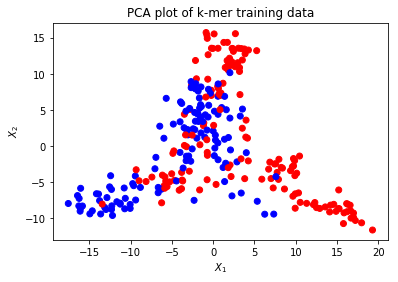

In [69]:
colours = ['red','blue']

plt.scatter(kmers_training_pca_without_whitening[:, 0],kmers_training_pca_without_whitening[:, 1],
            c=label_training_set, cmap=matplotlib.colors.ListedColormap(colours))
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.title('PCA plot of k-mer training data')
plt.show()

I apply learn PCA without whitening to the k-mer test data set and reduce the number of features (dimensions) to 2. I then plot test data.

In [70]:
kmer_test_pca_without_whitening = pca_without_whitening.transform(kmers_test_set.todense())

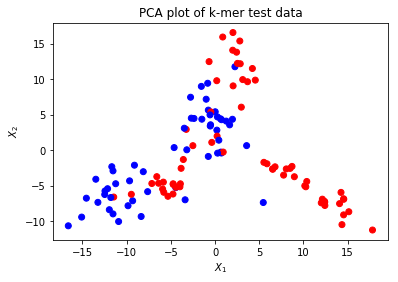

In [71]:
colours = ['red','blue']

plt.scatter(kmer_test_pca_without_whitening[:, 0],kmer_test_pca_without_whitening[:, 1],
            c=label_test_set, cmap=matplotlib.colors.ListedColormap(colours))
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.title('PCA plot of k-mer test data')
plt.show()

I then print the explained variance and singular values for each singular value 

In [72]:
num = len(pca_without_whitening.explained_variance_)
for i in range(num):
    print('Component',i, 'explains',pca_without_whitening.explained_variance_[i],'variance')
    print('Component',i, 'has singular value', pca_without_whitening.singular_values_[i])

Component 0 explains 60.88026635924089 variance
Component 0 has singular value 128.9197917934743
Component 1 explains 52.297747913922606 variance
Component 1 has singular value 119.48759425354949


## Exercise 3.1

Using the variables kmers_training_set_dense and kmers_test_set_dense, apply PCA with whiten to the k-mer training and test data set. The variables are initialized in the cell below.

Store the reduced training in the variable, kmer_train_pca_with_whitening, and the reduced training in the variable, kmer_test_pca_with_whitening.

Run the below code to generate a plot. Comment on the differences between the whitened and unwhitened(???????) plots.

In [77]:
kmers_training_set_dense = kmers_training_set.todense()
kmers_test_set_dense = kmers_test_set.todense()

pca_with_whitening = PCA(n_components=2,whiten=True)
kmers_training_pca_with_whitening = pca_with_whitening.fit_transform(kmers_training_set_dense)

kmer_test_pca_with_whitening = pca_with_whitening.transform(kmers_test_set_dense)

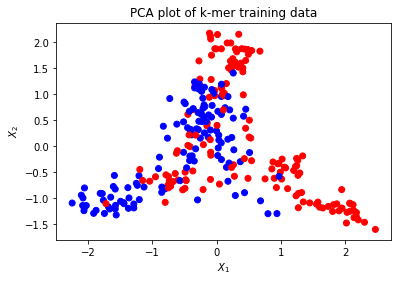

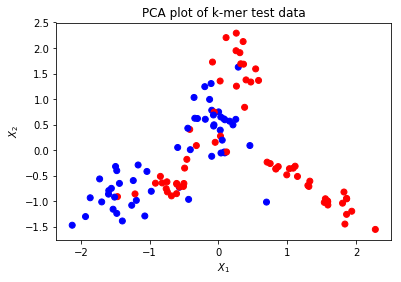

In [78]:
colours = ['red','blue']

plt.scatter(kmers_training_pca_with_whitening[:, 0],kmers_training_pca_with_whitening[:, 1],
            c=label_training_set, cmap=matplotlib.colors.ListedColormap(colours))
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.title('PCA plot of k-mer training data')
plt.show()

colours = ['red','blue']

plt.scatter(kmer_test_pca_with_whitening[:, 0],kmer_test_pca_with_whitening[:, 1],
            c=label_test_set, cmap=matplotlib.colors.ListedColormap(colours))
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.title('PCA plot of k-mer test data')
plt.show()

# 4. Classification

In [92]:
from sklearn.naive_bayes import GaussianNB
gNB=GaussianNB()
gNB.fit(kmers_training_set_dense,label_training_set)

GaussianNB(priors=None)

In [88]:
print(gNB.class_count_)
print(gNB.theta_)
print(gNB.sigma_)
print(gNB.score(kmers_training_set_dense,label_training_set))
print(gNB.score(kmers_test_set_dense,label_test_set))

#TODO: ADD SCORE TO NATIVE BAYES PRESENTATION

[150. 124.]
[[0.         0.         0.         ... 0.00666667 0.00666667 0.00666667]
 [0.02419355 0.02419355 0.02419355 ... 0.         0.         0.        ]]
[[2.50000000e-10 2.50000000e-10 2.50000000e-10 ... 6.62222247e-03
  6.62222247e-03 6.62222247e-03]
 [2.36082209e-02 2.36082209e-02 2.36082209e-02 ... 2.50000000e-10
  2.50000000e-10 2.50000000e-10]]
1.0
0.8813559322033898


In [95]:
from sklearn.metrics import confusion_matrix

predict_label_train_set = gNB.predict(kmers_training_set_dense)
predict_label_test_set = gNB.predict(kmers_test_set_dense)

print(confusion_matrix(label_training_set,predict_label_train_set))
print(confusion_matrix(label_test_set,predict_label_test_set))

[[150   0]
 [  0 124]]
[[56  8]
 [ 6 48]]


## Exercise 4.1
Apply Native Bayes to the PCA data and print confusion matrix for test data

In [106]:
from sklearn.linear_model import LogisticRegression
lgr=LogisticRegression()
lgr.fit(kmers_training_set_dense,label_training_set)
print(lgr.coef_) #TODO: CHANGE IN PRESENTATION
print(lgr.intercept_)
print(lgr.score(kmers_training_set_dense,label_training_set))
print(lgr.score(kmers_test_set_dense,label_test_set))
predict_label_train_set_lgr = lgr.predict(kmers_training_set_dense)
predict_label_test_set_lgr = lgr.predict(kmers_test_set_dense)
print(confusion_matrix(label_training_set,predict_label_train_set_lgr))
print(confusion_matrix(label_test_set,predict_label_test_set_lgr))

[[ 0.00751756  0.00751756  0.00751756 ... -0.00051974 -0.00051974
  -0.00051974]]
[0.00528085]
1.0
0.9576271186440678
[[150   0]
 [  0 124]]
[[61  3]
 [ 2 52]]


## Exercise 4.2
Apply Logistic Regression to the PCA data and print confusion matrix for test data

In [110]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(max_depth=None,random_state=0)
dtc.fit(kmers_training_set_dense,label_training_set)
#for feature,importance in zip(avocado_explanatory_variables.columns.values.tolist(),dtc.feature_importances_):
#    print(feature,'variable has importance,', importance,'\n')
print(dtc.feature_importances_)
print('The accuracy for training set is: ',dtc.score(kmers_training_set_dense,label_training_set))
print('The accuracy for test set is: ',dtc.score(kmers_test_set_dense,label_test_set))
predict_label_train_set_lgr = dtc.predict(kmers_training_set_dense)
predict_label_test_set_lgr =  dtc.predict(kmers_test_set_dense)
print(confusion_matrix(label_training_set,predict_label_train_set_lgr))
print(confusion_matrix(label_test_set,predict_label_test_set_lgr))


[0. 0. 0. ... 0. 0. 0.]
The R^2 value for training set is:  1.0
The R^2 value for test set is:  0.8728813559322034
[[150   0]
 [  0 124]]
[[56  8]
 [ 7 47]]


## Exercise 4.3

Apply a decision tree to the PCA data and print confusion matrix for test data

In [118]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

adaboost = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                              n_estimators=50, random_state=0)
adaboost.fit(kmers_training_set_dense,label_training_set)
#for feature,importance in zip(avocado_explanatory_variables.columns.values.tolist(),dtc.feature_importances_):
#    print(feature,'variable has importance,', importance,'\n')
print(adaboost.feature_importances_)
print('The accuracy for training set is: ',adaboost.score(kmers_training_set_dense,label_training_set))
print('The accuracy for test set is: ',adaboost.score(kmers_test_set_dense,label_test_set))
predict_label_train_set_ada = adaboost.predict(kmers_training_set_dense)
predict_label_test_set_ada =  adaboost.predict(kmers_test_set_dense)
print(confusion_matrix(label_training_set,predict_label_train_set_ada))
print(confusion_matrix(label_test_set,predict_label_test_set_ada))

[0. 0. 0. ... 0. 0. 0.]
The accuracy for training set is:  1.0
The accuracy for test set is:  0.923728813559322
[[150   0]
 [  0 124]]
[[60  4]
 [ 5 49]]


## Exercise 4.4
Apply Adaboost to the PCA data and print confusion matrix for test data

In [122]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(kmers_training_set_dense,label_training_set)
#for feature,importance in zip(avocado_explanatory_variables.columns.values.tolist(),dtc.feature_importances_):
#    print(feature,'variable has importance,', importance,'\n')
print('The accuracy for training set is: ',knn.score(kmers_training_set_dense,label_training_set))
print('The accuracy for test set is: ',knn.score(kmers_test_set_dense,label_test_set))
predict_label_train_set_knn = knn.predict(kmers_training_set_dense)
predict_label_test_set_knn =  knn.predict(kmers_test_set_dense)
print(confusion_matrix(label_training_set,predict_label_train_set_knn))
print(confusion_matrix(label_test_set,predict_label_test_set_knn))

The accuracy for training set is:  0.8941605839416058
The accuracy for test set is:  0.9067796610169492
[[146   4]
 [ 25  99]]
[[62  2]
 [ 9 45]]


## Exercise 4.5
Apply KNN to the PCA data and print confusion matrix for test data

# 5. Model Selection